## The first Jupyter Notebook (API data)

### 1.  Import Key Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### libraries for API's
import requests 
import json

### 2. Load Data from a publicly available API

#### You can find detailed information about the Carbon Intensity API at the following link:  [Carbon Intensity API Documentation](https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0)

In [12]:
# API request for intensity stats data
response= requests.get("https://api.carbonintensity.org.uk/intensity/stats/2017-09-18T12:00Z/2017-10-01T12:00Z/2")

### 3. Parse the response as JSON

In [13]:
# Load JSON response
data1= json.loads(response.text) 

### 4. Create a dataframe from the array

In [14]:
# Normalize the JSON data into a DataFrame
df = pd.json_normalize(data1["data"]) 

# Display the DataFrame
df

,from,to,intensity.max,intensity.average,intensity.min,intensity.index
0,2017-09-18T12:00Z,2017-09-18T14:00Z,308,305,301,high
1,2017-09-18T14:00Z,2017-09-18T16:00Z,344,328,308,high
2,2017-09-18T16:00Z,2017-09-18T18:00Z,355,352,349,high
3,2017-09-18T18:00Z,2017-09-18T20:00Z,359,358,356,high
4,2017-09-18T20:00Z,2017-09-18T22:00Z,360,332,298,high
...,...,...,...,...,...,...
151,2017-10-01T02:00Z,2017-10-01T04:00Z,183,170,157,low
152,2017-10-01T04:00Z,2017-10-01T06:00Z,156,153,152,low
153,2017-10-01T06:00Z,2017-10-01T08:00Z,154,150,145,low
154,2017-10-01T08:00Z,2017-10-01T10:00Z,152,150,146,low


### 4. Plot some Data
#### The plot shows a comparison of the maximum, average, and minimum intensity values, allowing us to clearly understand the extremes of carbon emissions.

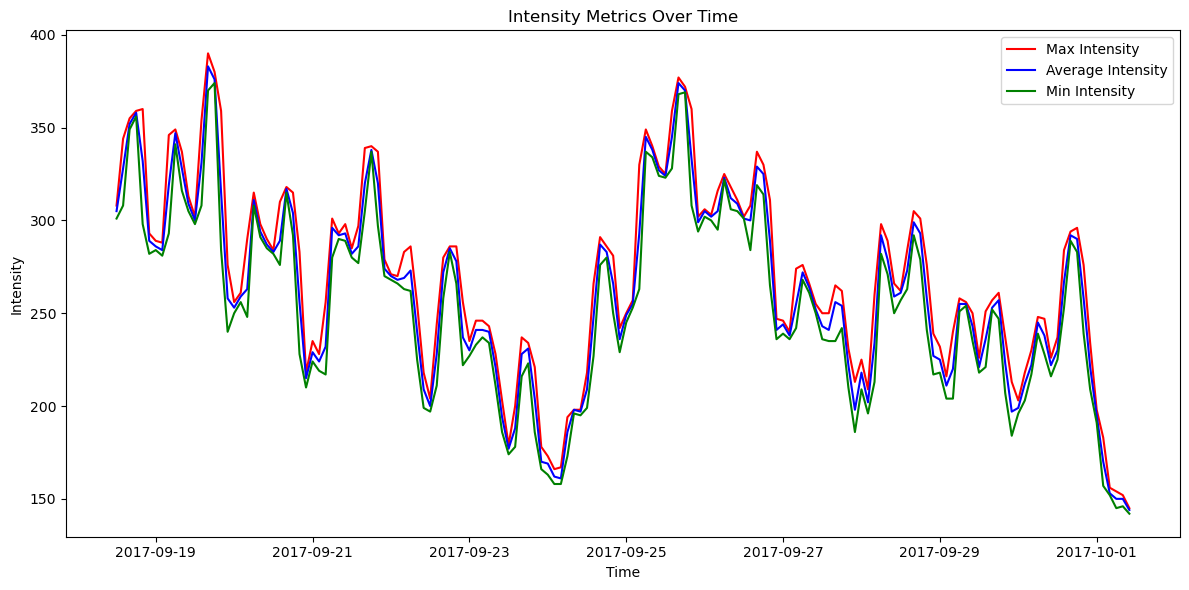

In [15]:
# Matplotlib chart comparing the maximum, average, and minimum intensity values 

df['from'] = pd.to_datetime(df['from'])
plt.figure(figsize=(12, 6))
plt.plot(df['from'], df['intensity.max'], label='Max Intensity', color='red')
plt.plot(df['from'], df['intensity.average'], label='Average Intensity', color='blue')
plt.plot(df['from'], df['intensity.min'], label='Min Intensity', color='green')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Intensity Metrics Over Time')
plt.legend()
plt.tight_layout()
plt.show()